In [1]:
# Import the pandas library
import pandas as pd

# Read the Excel file into a DataFrame
vendors = pd.read_csv("vendors.csv")
products = pd.read_csv("products.csv")
inventory = pd.read_csv("inventory.csv")
purchase_orders = pd.read_csv("purchase_orders.csv")
sales_orders = pd.read_csv("sales_orders.csv")

print("Data Loaded Successfully!")




Data Loaded Successfully!


# First 5 rows of each table

In [2]:
vendors.head()
products.head()
inventory.head()
purchase_orders.head()
sales_orders.head()

,sales_id,product_id,date,quantity_sold,selling_price
0,S00000,P0111,23-01-2023,15,2429.96
1,S00001,P0030,20-06-2023,9,3233.80
2,S00002,P0072,29-07-2023,16,2403.08
3,S00003,P0086,02-08-2023,8,267.57
4,S00004,P0058,18-02-2023,18,2001.26


In [3]:
vendors.info()
products.info()
inventory.info()
purchase_orders.info()
sales_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sales_id       2000 non-null   object 
 1   product_id     2000 non-null   object 
 2   date           2000 non-null   object 
 3   quantity_sold  2000 non-null   int64  
 4   selling_price  2000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     120 non-null    object 
 1   category       120 non-null    object 
 2   reorder_level  120 non-null    int64  
 3   unit_cost      120 non-null    float64
 4   vendor_id      120 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

# Number of Unique Rows

In [4]:
print(vendors.nunique())
print(products.nunique())
print(inventory.nunique())
print(purchase_orders.nunique())
print(sales_orders.nunique())

sales_id         2000
product_id        120
date              364
quantity_sold      19
selling_price    1994
dtype: int64
product_id       120
category           3
reorder_level     62
unit_cost        120
vendor_id         20
dtype: int64
product_id         120
current_stock      105
safety_stock        63
stockout_days       20
avg_daily_sales     37
dtype: int64
po_id                     1299
vendor_id                   20
product_id                 120
order_date                 300
expected_delivery_date     313
actual_delivery_date       287
quantity_ordered           289
quantity_received          293
fill_rate                  768
dtype: int64
sales_id         2000
product_id        120
date              364
quantity_sold      19
selling_price    1994
dtype: int64


# Missing Values

In [5]:
vendors.isnull().sum()
products.isnull().sum()
inventory.isnull().sum()
purchase_orders.isnull().sum()
sales_orders.isnull().sum()

sales_id         0
product_id       0
date             0
quantity_sold    0
selling_price    0
dtype: int64

# Remove duplicates

In [10]:
vendors.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
inventory.drop_duplicates(inplace=True)
purchase_orders.drop_duplicates(inplace=True)
sales_orders.drop_duplicates(inplace=True)

# Check Missing Values After Cleaning

In [7]:
print(vendors.isnull().sum())
print(products.isnull().sum())
print(inventory.isnull().sum())
print(purchase_orders.isnull().sum())
print(sales_orders.isnull().sum())

sales_id         0
product_id       0
date             0
quantity_sold    0
selling_price    0
dtype: int64
product_id       0
category         0
reorder_level    0
unit_cost        0
vendor_id        0
dtype: int64
product_id         0
current_stock      0
safety_stock       0
stockout_days      0
avg_daily_sales    0
dtype: int64
po_id                     0
vendor_id                 0
product_id                0
order_date                0
expected_delivery_date    0
actual_delivery_date      0
quantity_ordered          0
quantity_received         0
fill_rate                 0
dtype: int64
sales_id         0
product_id       0
date             0
quantity_sold    0
selling_price    0
dtype: int64


In [12]:
vendors.to_csv("vendors.csv", index=False)
products.to_csv("products.csv", index=False)
inventory.to_csv("inventory.csv", index=False)
purchase_orders.to_csv("purchase_orders.csv", index=False)
sales_orders.to_csv("sales_orders.csv", index=False)


vendors.isna().sum()
products.isna().sum()
inventory.isna().sum()
purchase_orders.isna().sum()
sales_orders.isna().sum()

# Handle Missing Values

In [17]:
vendors.isna().sum()
products.isna().sum()
inventory.isna().sum()
purchase_orders.isna().sum()
sales_orders.isna().sum()

sales_id         0
product_id       0
date             0
quantity_sold    0
selling_price    0
dtype: int64

# Handle Outliers

In [18]:
import numpy as np

# Cap sales quantity to remove extreme outliers
q99 = sales_orders['quantity_sold'].quantile(0.99)
sales_orders['quantity_sold'] = np.where(
    sales_orders['quantity_sold'] > q99,
    q99,
    sales_orders['quantity_sold']
)

# Merge Dataset Fields

In [21]:
inventory_full = inventory.merge(products, on='product_id')

In [22]:
sales_full = sales_orders.merge(products, on='product_id')

In [26]:
po_full = purchase_orders.merge(products, on='product_id')
po_full = po_full.merge(vendors, on='product_id')

In [27]:
sales_full.describe()
inventory_full.describe()
po_full.describe()

,quantity_ordered,quantity_received,fill_rate,reorder_level,unit_cost,quantity_sold,selling_price
count,21536.000000,21536.000000,21536.000000,21536.000000,21536.000000,21536.000000,21536.000000
mean,156.753947,152.331816,94.645840,57.810410,1534.135985,9.953566,2061.226327
std,83.495313,83.559607,9.108730,21.927234,800.054835,5.463880,1099.550004
min,10.000000,2.000000,20.000000,20.000000,92.460000,1.000000,105.380000
25%,87.000000,83.000000,94.615385,39.000000,916.100000,5.000000,1244.640000
50%,158.000000,153.000000,97.163121,56.000000,1617.500000,10.000000,2165.540000
75%,227.000000,224.000000,98.744770,78.000000,2120.800000,15.000000,2875.490000
max,299.000000,299.000000,100.000000,99.000000,2970.660000,19.000000,4748.370000


In [36]:
import matplotlib.pyplot as plt


# Top 10 Selling Products (Quantity)

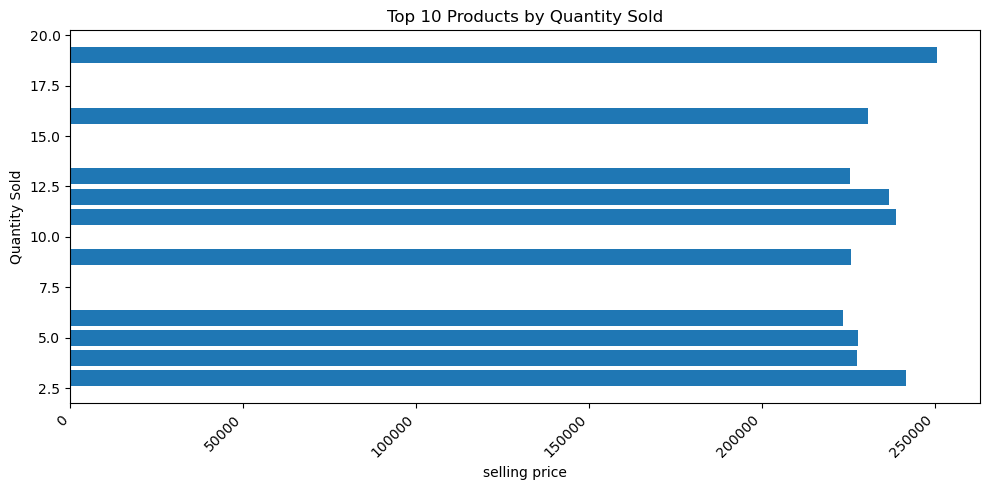

In [95]:
top10 = sales_full.groupby('quantity_sold')['selling_price'] \
                  .sum() \
                  .sort_values(ascending=False) \
                  .head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10.index, top10.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("selling price")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

# Top 10 Category by unit cost

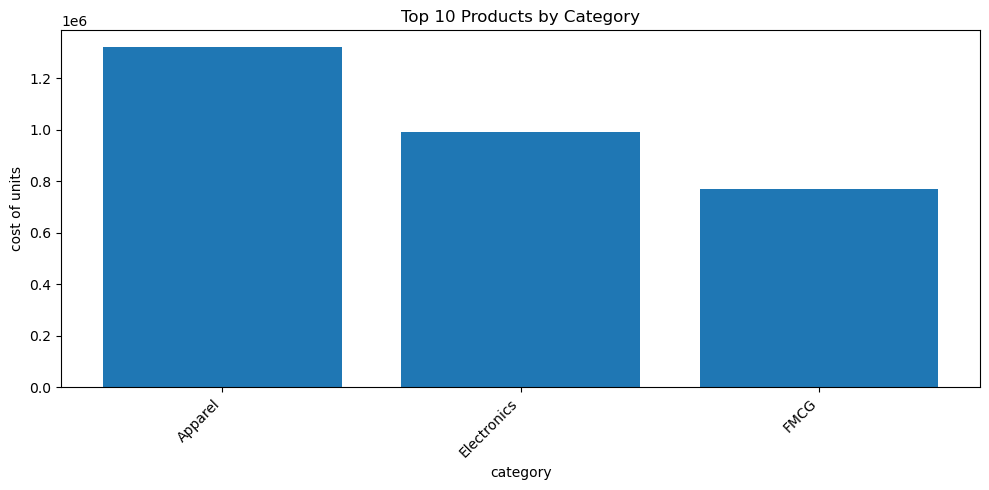

In [102]:
top10_rev = sales_full.groupby('category')['unit_cost'] \
                      .sum() \
                      .sort_values(ascending=False) \
                      .head(10)

plt.figure(figsize=(10, 5))
plt.bar(top10_rev.index, top10_rev.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Products by Category")
plt.xlabel("category")
plt.ylabel("cost of units")
plt.tight_layout()
plt.show()

# Monthly Sales Trend

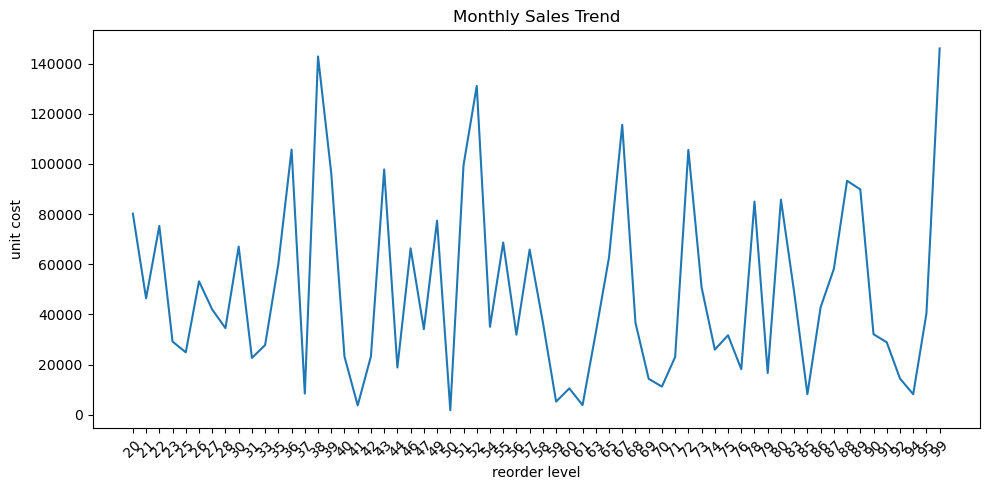

In [105]:
monthly_sales = sales_full.groupby('reorder_level')['unit_cost'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("reorder level")
plt.ylabel("unit cost")
plt.tight_layout()
plt.show(5)